# Applied Inversion Class Test: FWI section

## Total time: 1.5 hours (2 questions)

Below are some examples of what you may be asked during the test and some general guidance.

You will be expected to write code, analyse outputs, and explain your reasoning clearly. It may be useful to bring pens and papers with you to assist with calculations. You will not need to submit any of your hand written notes.

---
## Question 1 – Newton's Method vs Gradient Descent (Approx. 45 minutes)

Consider the function:
$$ f(x, y) = 3x^2 + y^2 + 4xy - 6x - 9y $$

1. **Compute the gradient** $\nabla f(x, y)$ and the **Hessian** $H(x, y)$.
2. **Find the eigenvalues** of the Hessian matrix. Comment on their significance for optimization.
3. **Implement Newton’s Method** to find the minimum of this function starting from the initial point $(x_0, y_0) = (0, 0)$.
4. **Implement Gradient Descent** using the same starting point. Use knowledge of the eigenvalues to pick an appropriate step length (you may try multiple values).
5. **Compare the convergence** of the two methods:
   - How many iterations are needed for convergence?
   - How sensitive is Gradient Descent to the choice of step length?
   - Explain the observed behaviour with reference to the eigenvalues of the Hessian.


---
## Question 2 – Full Waveform Inversion (FWI) Analysis (Approx. 45 minutes)

**You will be provided with a working FWI implementation - this will be very similar to the code you were provided with in Lecture 8. This will be based on the Devito package. You will NOT need to write any Devito specific code. You will need to have a good overview of how the algorithm works. You will be asked to run the provided code and may be required to tweak various parameters and interpret how they affect the results, for example:**

1. **Shot Record Analysis:**
   - Plot and inspect the provided shot records.
   - Modify the number of absorbing boundary layers in the code.
   - Explain how this change affects the shot records (e.g., artificial reflections at the edges of the domain).

2. **Step Length Tuning:**
   - Explore different values of the step length $\alpha$ used in the model update step.
   - Identify a range of $\alpha$ for which convergence occurs and a rough optimal value.
   - Comment on the effects of too-small or too-large $\alpha$ in terms of convergence speed and stability.

**You will be required to justify your answers with plots and explanations. As practice you can tweak `nbl`, `alpha` and other parameters in the Lecture 8 notebook you were provided and analyse the effects.**

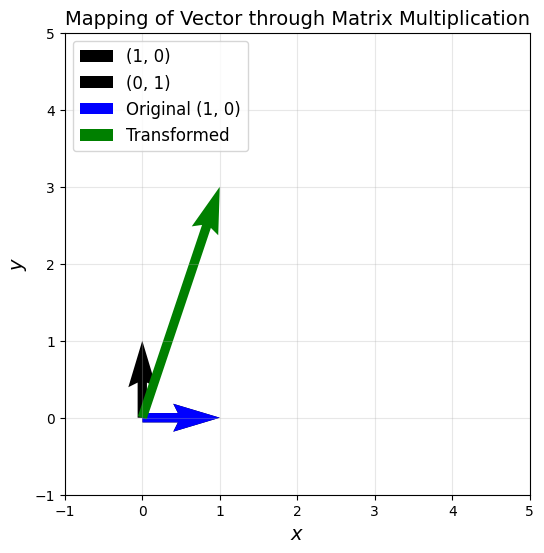

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)

ax1.set_xlabel("$x$", fontsize=14)
ax1.set_ylabel("$y$", fontsize=14)
ax1.set_title('Mapping of Vector through Matrix Multiplication', fontsize=14)

# Original basis vectors
i = np.array([1, 0])
j = np.array([0, 1])

# Plot the original basis vectors
ax1.quiver(0, 0, i[0], i[1], angles='xy', scale_units='xy', scale=1, color='k', width=0.02, label='(1, 0)')
ax1.quiver(0, 0, j[0], j[1], angles='xy', scale_units='xy', scale=1, color='k', width=0.02, label='(0, 1)')

# Define matrix A
A = np.array([[1., 2.], [3., 4.]])

# Define the original vector (1, 0)
original_vec = np.array([1, 0])

# Calculate the transformed vector
transformed_vec = A @ original_vec  # Matrix-vector multiplication

# Plot the original vector
ax1.quiver(0, 0, original_vec[0], original_vec[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.02, label='Original (1, 0)')

# Plot the transformed vector
ax1.quiver(0, 0, transformed_vec[0], transformed_vec[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.02, label='Transformed')

# Set limits and grid
ax1.set_xlim(-1, 5)
ax1.set_ylim(-1, 5)
ax1.grid(alpha=0.3)

ax1.legend(loc='upper left', fontsize=12)
plt.show()

In [27]:
import numpy as np
A = np.array([[1, 1, 5], [2, 3, 13], [1, 3, 11]])
sps = np.array([1, 0, 0])
null = np.array([-2, -3, 1])
rhs = np.array([1,2,1])
for i in range(1,10):
    print('solution', A@(sps+i*null))
print(rhs==A@(sps+i*null))

solution [1 2 1]
solution [1 2 1]
solution [1 2 1]
solution [1 2 1]
solution [1 2 1]
solution [1 2 1]
solution [1 2 1]
solution [1 2 1]
solution [1 2 1]
[ True  True  True]


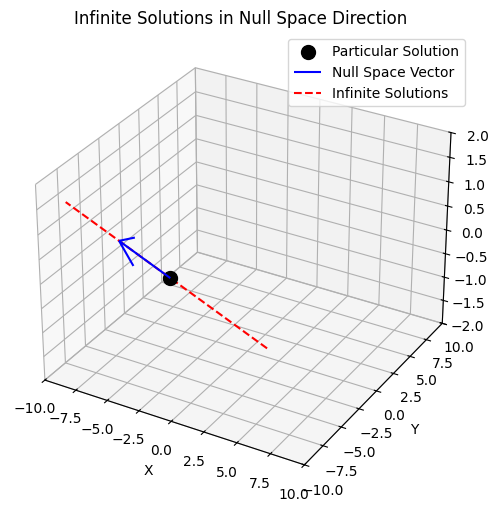

In [6]:
# question2 :null space:(-2, -3, 1), specific solution:(-3, -5, 0)
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Null Space Vector
v = np.array([-2, -3, 1])

# Particular Solution
x_p = np.array([-3, -5, 0])

# Plot particular solution
ax.scatter(x_p[0], x_p[1], x_p[2], color='black', s=100, label='Particular Solution')

# Plot null space vector
ax.quiver(x_p[0], x_p[1], x_p[2], v[0], v[1], v[2], color='blue', label='Null Space Vector', length=1.0)

# Generate multiple solutions by varying lambda
lambdas = np.linspace(-2, 2, 10)
solutions = [x_p + lam * v for lam in lambdas]
solutions = np.array(solutions)

# Plot the line of solutions
ax.plot(solutions[:, 0], solutions[:, 1], solutions[:, 2], color='red', linestyle='--', label='Infinite Solutions')

# Labels and settings
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Infinite Solutions in Null Space Direction')
ax.legend()
plt.grid(alpha=0.3)
plt.show()

# Matt

In [13]:
G = np.array([[1, 0, 1, 0], [2, 1, 0, 1]])
print(np.linalg.matrix_rank(G))

2


[[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
   0.66666667  1.11111111  1.55555556  2.        ]
 [ 5.          4.11111111  3.22222222  2.33333333  1.44444444  0.55555556
  -0.33333333 -1.22222222 -2.11111111 -3.        ]
 [ 2.          1.55555556  1.11111111  0.66666667  0.22222222 -0.22222222
  -0.66666667 -1.11111111 -1.55555556 -2.        ]]


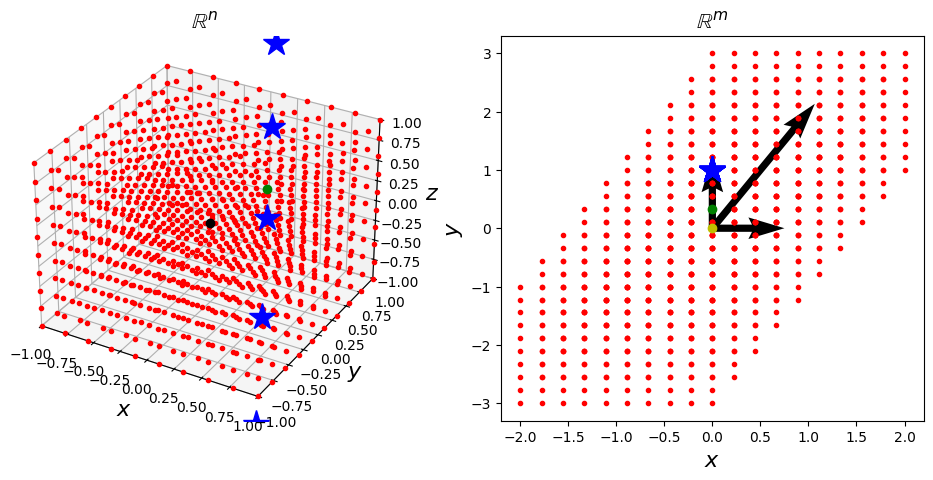

In [23]:
# let's plot the transformation

A = np.array([[1, 0, 1], [2, 1, 0]])


x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
z = np.linspace(-1, 1, 10)
# this creates a mesh of points in 2D
xx, yy, zz = np.meshgrid(x, y, z)
# convert to row vectors
xxx = np.reshape(xx,(1,np.size(xx)))
yyy = np.reshape(yy,(1,np.size(yy)))
zzz = np.reshape(zz,(1,np.size(zz)))
# convert to a 2 x N matrix of vectors/points
vecs = np.vstack((xxx,yyy,zzz))

# transform these points
Avecs = A@vecs

# the family of possible solutions, just a selection based on a restricted range of alpha values
alpha = np.linspace(-2, 2, 10)
x_sols = np.vstack((alpha, 1 - 2*alpha, -1*alpha))
# x_sols = np.vstack((alpha, 1/2 - alpha, -1/2))

# and check where they map to
Ax_sols = A@x_sols
print(x_sols)
# plot
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(vecs[0,:], vecs[1,:], vecs[2,:], 'r.')
ax1.set_xlabel('$x$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_zlabel('$z$', fontsize = 16)
ax1.set_title('$\mathbb{R}^n$', fontsize = 16)
ax1.set_xlim3d(-1, 1)
ax1.set_ylim3d(-1, 1)
ax1.set_zlim3d(-1, 1)
ax1.plot(x_sols[0,:], x_sols[1,:], x_sols[2,:], 'b*',markersize=20)
ax1.plot(0.333, 0.333, 0.333, 'go')
ax1.plot(0, 0, 0, 'ko')
                        

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(Avecs[0,:], Avecs[1,:], 'r.')
ax2.set_xlabel('$x$', fontsize = 16)
ax2.set_ylabel('$y$', fontsize = 16)
ax2.set_title('$\mathbb{R}^m$', fontsize = 16)
ax2.plot(Ax_sols[0,:], Ax_sols[1,:], 'b*',markersize=20)
ax2.plot(0.33333,0.33333,0.3333, 'go')
ax2.plot(0, 0, 0, 'yo')
# add the column vectors
vec1 = A[:,0]; vec2 = A[:,1]; vec3 = A[:,2]
ax2.quiver(0, 0, vec1[0], vec1[1] , angles='xy', units='xy', scale=1, color='black', width=.1,  label='vec1')
ax2.quiver(0, 0, vec2[0], vec2[1] , angles='xy', units='xy', scale=1, color='black', width=.1,  label='vec2')
ax2.quiver(0, 0, vec3[0], vec3[1] , angles='xy', units='xy', scale=1, color='black', width=.1,  label='vec3')

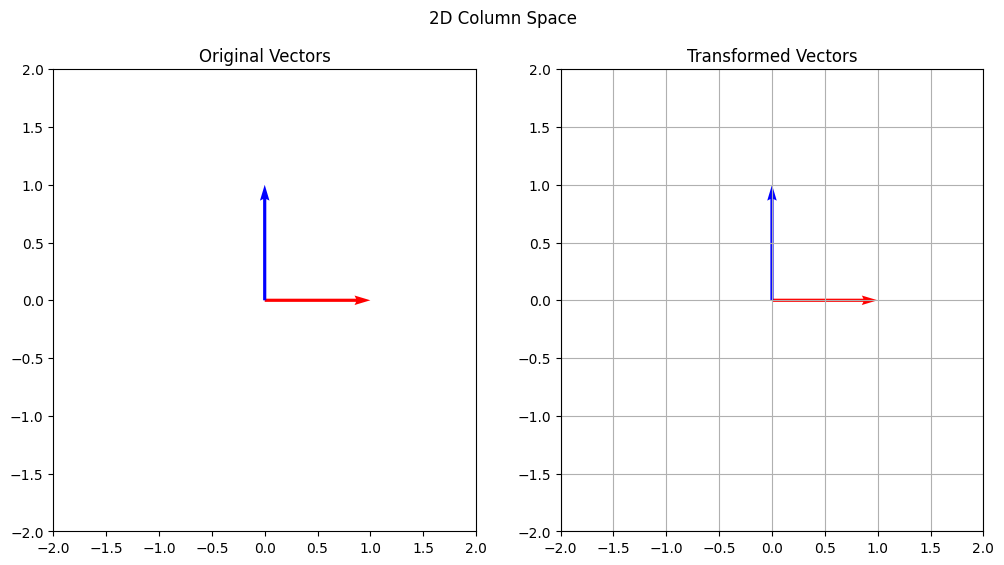

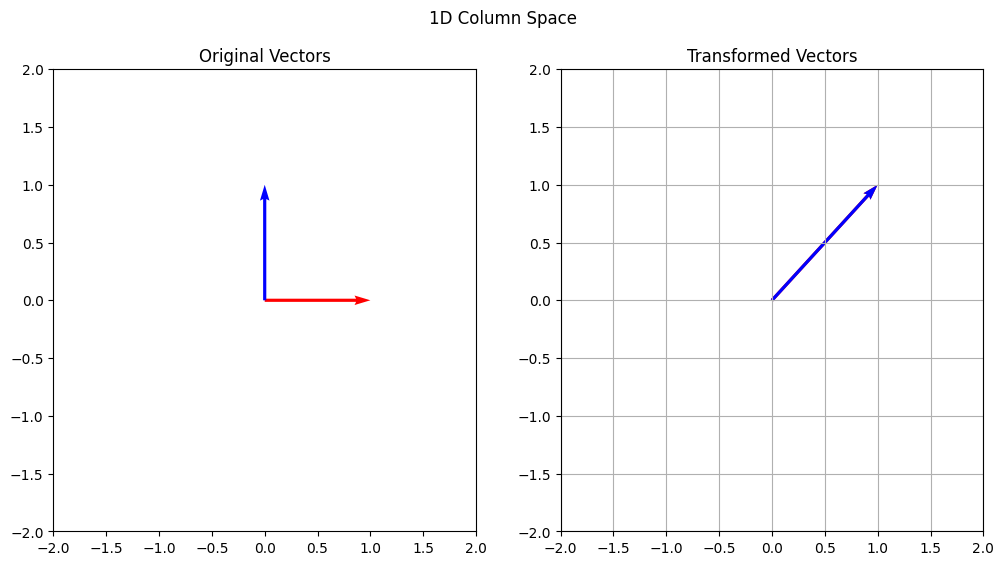

No solution for b_exist
No solution for b_nonexist


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors(vectors, colors, ax):
    for i, vector in enumerate(vectors):
        ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=colors[i])

def visualize_mapping(A, vectors, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].set_xlim(-2, 2)
    ax[0].set_ylim(-2, 2)
    ax[0].set_title('Original Vectors')
    plot_vectors(vectors, ['red', 'blue'], ax[0])

    # Apply matrix A to each vector
    transformed_vectors = [A @ vector for vector in vectors]

    ax[1].set_xlim(-2, 2)
    ax[1].set_ylim(-2, 2)
    ax[1].set_title('Transformed Vectors')
    plot_vectors(transformed_vectors, ['red', 'blue'], ax[1])

    fig.suptitle(title)
    plt.grid()
    plt.show()

# Example with 2D Column Space
A_2D = np.array([[1, 0], [0, 1]])
vectors_2D = [np.array([1, 0]), np.array([0, 1])]
visualize_mapping(A_2D, vectors_2D, "2D Column Space")

# Example with 1D Column Space
A_1D = np.array([[1, 1], [1, 1]])
vectors_1D = [np.array([1, 0]), np.array([0, 1])]
visualize_mapping(A_1D, vectors_1D, "1D Column Space")

# Demonstrating Existence vs Non-existence of Solutions
b_exist = np.array([2, 2])
b_nonexist = np.array([2, 3])

try:
    x_exist = np.linalg.solve(A_1D, b_exist)
    print("Solution for b_exist:", x_exist)
except np.linalg.LinAlgError:
    print("No solution for b_exist")

try:
    x_nonexist = np.linalg.solve(A_1D, b_nonexist)
    print("Solution for b_nonexist:", x_nonexist)
except np.linalg.LinAlgError:
    print("No solution for b_nonexist")
